In [2]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_pickle('df-pkl')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# filter for the job titles and country
df_PT = df[(df['job_country'] == 'Portugal')].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = df_PT['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_PT_top6 = df_PT[df_PT['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_PT_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Scientist',
 'Software Engineer']

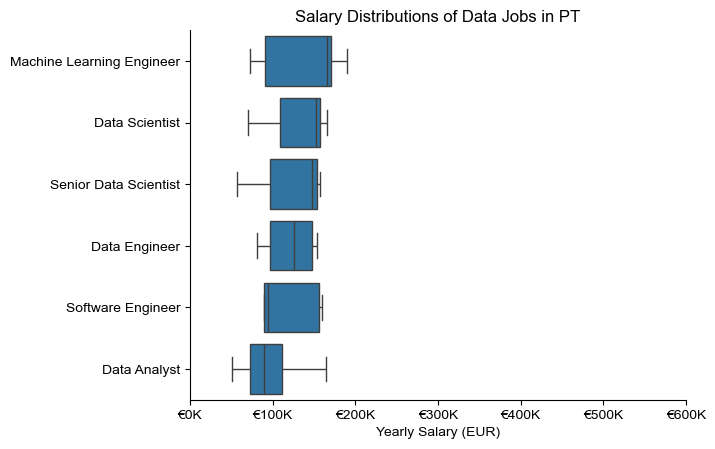

In [5]:
sns.boxplot(data=df_PT_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in PT')
plt.xlabel('Yearly Salary (EUR)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'€{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [6]:
# Drop NaN values in salary_year_avg and job_skills
df_cleaned = df.dropna(subset=['salary_year_avg', 'job_skills']).copy()

# Filter the DataFrame for Data Analyst roles in Portugal
df_DA = df_cleaned[(df_cleaned['job_title_short'] == 'Data Analyst') & (df_cleaned['job_country'] == 'Portugal')]

# Explode the job_skills column to create individual rows for each skill
df_DA = df_DA.explode('job_skills')

# Sort by the highest paying salary
df_DA_sorted = df_DA.sort_values(by='salary_year_avg', ascending=False)

# Show the first 5 rows after sorting
df_DA_sorted[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
699216,165000.0,sql server
306292,165000.0,spark
306292,165000.0,databricks
699216,165000.0,sql
699216,165000.0,python


In [7]:

df_DA_top_pay = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
azure,1,165000.0
gdpr,1,165000.0
git,1,165000.0
sql server,2,141595.0
databricks,2,138087.5
sap,2,127050.0
bigquery,3,118190.0
vba,1,111175.0
tableau,8,111175.0


In [8]:
df_DA_skills = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
bigquery,3,118190.0
sql,15,111175.0
tableau,8,111175.0
looker,7,111175.0
r,5,111175.0
spark,4,100137.5
python,13,89204.0
power bi,5,89100.0
excel,8,76875.0


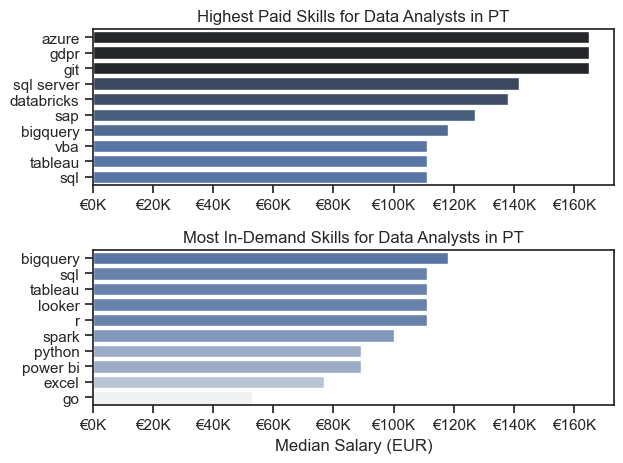

In [9]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in PT')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in PT')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (EUR)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()